# Import Libraries

In [1]:
import os
import cv2
import numpy as np
from glob import glob
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
!pip install segmentation-models-pytorch
import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix, accuracy_score
import datetime # Importing the datetime module

start_time = datetime.datetime.now()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 9.0 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=cde0eb4a5edacbc4ccdcfbc3e5f8cd0d1a7c5e484291187b8d9509eef97a14a4
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=07f76bf08d9bc2450b092e54f834604f4118fb655361c9c4a39327d1ef9ef66b
  Stored in directory: /root/.cache/pip/wheels/5f/5b/96/fd94bc35962d7c6b699e8814db545155ac91d2b95785e1b035
Successfully built efficientnet-pytorch pretrainedmodels


In [2]:
import datetime

print(f"Hora de inicio: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Hora de inicio: 2025-01-25 19:50:27


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

FOLDER = '/content/drive/My Drive/DATA_LINDEROS/'
sys.path.append(FOLDER)


Mounted at /content/drive


# Preprocessing

In [4]:
IMAGE_PATH = '/content/drive/MyDrive/DATA_LINDEROS/DATASET_Subachoque/Ortofoto_512x512/'
MASK_PATH = '/content/drive/MyDrive/DATA_LINDEROS/DATASET_Subachoque/Linderos_512x512/'
batch_size = 8

#!ls '/content/drive/My Drive/DATA_LINDEROS/LINDEROS/'
import os
contenido = os.listdir('/content/drive/MyDrive/DATA_LINDEROS/DATASET_Subachoque/Linderos_512x512/')
print(len(contenido))

#!ls '/content/drive/My Drive/DATA_LINDEROS/ORTOFOTO/'
contenido = os.listdir('/content/drive/MyDrive/DATA_LINDEROS/DATASET_Subachoque/Ortofoto_512x512/')
print(len(contenido))

# Define lists of image numbers for training and validation
#train_image_numbers = ['10010','10011','10014','10015','10016','10017','10018','10019','10020','10021','10022','10023','10024','10025','10026','10027','10028','10029','10030','10031','10032','10033','10034','10035','10036','10037','10038','10039','10040','10041','10042','10043','10044','10045','10046','10047','10048','10049','10050','10051','10052','10053','10054','10055','10056','10057','10058','10059','10060','10061','10062','10063','10064','10065','10066','10067','10068','10079','10080','10081','10082','10083','10085','10086','10087','10088','10089','10090','10091','10092','10093','10094','10095','10096','10097','10098','10099','10100','10101','10102','10105','10106','10107','10108','10109','10141','10142','10143','10144','12010','12011','12012','12013','12014','12015','12016','12017','12018','12019','1202','12020','12021','12022','12023','12024','12025','12026','12027','12028','12029','1203','12030','12031','12032','12033','12034','12035','12036','12037','12038','12039','12040','12041','12042','12043','12044','12045','12046','12047','12048','12049','1205','12051','12052','12053','12057','12058','1206','1209','12096','12097','12098','12099','1210','12100','12101','12102','12103','12104','12105','12106','12107','15626','15627','15628','15629','15630','15631','15632','15633','15634','15635','15636','15637','15638','15640','15641','15642','15643','15644','15645','15646','15647','15648','15651','15653','15654','15655','15656','15657','15658','15662','15663','15664','15667','15668','15669','15670','15671','15672','15673','15674','15675','15676','16479','16480','16481','16482','16483','16484','16486','16487','165','16529','16530','16531','16533','16534','16535','16536','16538','16539','16540','16541','16542','16543','16545','16546','16547','16548','16549','16550','16551','16552','16555','16556','16557','16558','16559','16560','16561','16562','16563','16564','16566','16567','16568','16569','16570','16572','16573','16577','16578','16579','16580','16581','16582','16583','16585','16586','16588','16589','16590','16591','16592','16593','16594','16595','17910','17911','17912','17913','17914','17915','17916','17917','17918','17919','17920','17921','17922','17923','17924','17925','17926','17927','17928','17930','17982','17983','17984','17985','17986','17987','17988','17989','17990','17991','17992','17993','17994','17995','17996','17997','17998','18000','18001','18002','18009','18010','18012','18022','18023','18024','18025','18026','18027','18028','18029','18030','18031','18032','18033','18034','18035','18036','18037','18038','18039','18040','18041','18042','18043','18044','18045','18046','18047','18048','18049','18050','18051','18052','18053','18054','18055','18056','18057','18058','18060','18061','18115','18116','1992','1993','1994','1995','1996','19962','19963','19965','19967','19968','19969','1997','19970','19974','19975','19976','19977','19978','19979','1998','19980','19981','19982','19983','19984','19985','19986','19987','19988','19989','1999','19990','19991','19992','19993','19994','19995','19996','19997','19998','19999','2000','20000','20001','20002','20003','2001','2002','20092','20093','20094','20095','20096','20098','20099','20100','20104','20105','20106','20107','20108','20109','20110','20111','20112','20113','20114','20115','20116','20117','20118','20119','20120','20121','20122','20123','20124','20125','20126','20127','20128','20129','20130','20131','22585','22586','22587','22588','22589','2259','22590','22591','22592','22593','22594','22595','22596','22597','22598','2260','22600','22601','2261','22705','22706','22707','22708','22709','22710','22711','22712','22713','22714','22715','22716','22717','22718','22719','22720','22721','22722','22723','22724','22725','22726','22727','3179','3180','32','3283','3284','3285','3286','3287','3288','3289','3290','3291','3292','3293','3294','3296','3303','3304','3305','3306','3307','3308','3309','3310','3311','3312','3410','3411','3413','3414','3415','3416','3417','3418','3419','3420','3421','3422','3423','3424','3425','3426','3429','3435','3436','3437','3438','3439','3440','3441','3442','3443','35','3539','3540','3541','3542','3543','3545','3546','3547','3548','3549','3550','3551','3552','3553','3554','3555','3556','3557','3558','3559','3565','3567','3568','3569','3570','3571','3572','3573','3574','3575','3576','36','3667','3668','3669','3670','3671','3672','3673','5401','5409','5410','5413','5414','5480','5481','5482','5483','5484','5485','5486','5487','5488','5489','549','5490','5491','5492','5493','5494','5495','5496','5497','5498','5499','550','5500','5501','5502','5503','5504','5505','5506','5507','5508','5509','551','5510','5511','5512','5513','5514','5515','5516','5517','5518','5519','552','5521','5522','5523','5524','5525','5526','5527','5528','5529','553','5530','5531','5532','5539','5540','5541','556','5607','5610','5611','5612','5614','5615','5616','5617','5619','562','5620','5621','5622','5623','5624','5625','5626','5627','5628','5629','563','5630','5631','5632','5633','5634','5635','6780','6781','6782','6783','6784','6785','6787','6788','6789','6790','6791','6792','6793','6794','6795','6796','6797','6798','6799','680','6800','6801','6802','6803','6804','6805','6806','6807','681','6810','6811','6813','6814','6815','6816','6817','6818','6819','682','6820','6821','6822','6823','6824','6825','6826']
train_image_numbers = ['161','291','292','293','296','297','419','421','422','427','556','686','814','815','816','945','946','1075','1081','1082','1203','1205','1210','1333','1334','1335','1339','1463','1471','1472','1473','1602','1604','1729','1731','1732','1988','1994','1997','2000','2116','2117','2118','2129','2130','2131','2246','2247','2248','2249','2250','2379','2380','2381','2382','2386','2389','2392','2507','2508','2510','2511','2516','2521','2637','2639','2647','2648','2649','2651','2768','2769','2772','2775','2780','2784','2897','2898','2899','2902','2904','2906','2912','2913','2914','2915','3025','3027','3028','3029','3030','3031','3032','3033','3034','3044','3045','3153','3157','3158','3160','3161','3164','3174','3176','3177','3178','3284','3285','3286','3289','3290','3291','3305','3306','3307','3308','3309','3411','3414','3415','3420','3421','3440','3441','3542','3546','3549','3554','3555','3558','3569','3572','3669','3670','3674','3676','3679','3684','3685','3686','3687','3688','3700','3702','3703','3704','3797','3798','3799','3800','3801','3802','3803','3804','3807','3808','3809','3811','3812','3814','3818','3819','3830','3835','3834','3836','3927','3928','3930','3931','3932','3935','3936','3942','3943','3947','3950','3952','3960','3961','3962','3967','4057','4058','4059','4060','4061','4064','4065','4067','4068','4070','4072','4073','4074','4075','4076','4078','4079','4080','4095','4097','4098','4186','4187','4190','4191','4192','4193','4194','4195','4196','4197','4198','4199','4200','4201','4204','4205','4206','4207','4208','4209','4210','4227','4230','4231','4236','4318','4319','4322','4323','4324','4325','4327','4328','4329','4330','4332','4339','4340','4342','4356','4357','4358','4359','4360','4363','4445','4446','4447','4448','4449','4450','4451','4452','4453','4454','4456','4457','4458','4459','4460','4461','4462','4463','4464','4465','4466','4467','4468','4469','4470','4471','4472','4486','4487','4491','4495','4574','4575','4576','4577','4580','4581','4582','4585','4587','4589','4591','4592','4593','4595','4596','4598','4599','4601','4618','4620','4622','4625','4627','4704','4705','4706','4708','4716','4717','4719','4720','4721','4722','4723','4724','4725','4726','4727','4728','4729','4730','4731','4748','4749','4750','4755','4756','4758','4833','4835','4836','4837','4838','4839','4840','4843','4844','4845','4846','4847','4848','4849','4850','4853','4854','4855','4856','4857','4859','4861','4862','4863','4864','4866','4878','4879','4883','4887','4960','4966','4967','4969','4970','4971','4972','4973','4974','4975','4976','4977','4978','4979','4980','4982','4983','4984','4985','4986','4987','4988','4989','4990','4991','4993','4996','5011','5012','5021','5095','5096','5097','5098','5099','5100','5101','5102','5103','5104','5105','5106','5107','5108','5109','5110','5111','5114','5115','5117','5118','5119','5120','5121','5122','5124','5126','5127','5138','5139','5140','5141','5142','5143','5145','5150','5221','5226','5227','5228','5229','5230','5232','5234','5235','5236','5237','5240','5241','5243','5246','5248','5249','5250','5253','5254','5255','5256','5257','5258','5264','5265','5266','5267','5280','5350','5351','5352','5355','5356','5357','5358','5359','5360','5361','5362','5363','5364','5366','5368','5369','5370','5371','5372','5378','5379','5380','5382','5383','5384','5385','5386','5387','5389','5394','5395','5396','5409','5480','5483','5484','5485','5487','5488','5489','5490','5491','5492','5493','5494','5495','5496','5497','5498','5499','5501','5502','5503','5504','5505','5506','5508','5509','5511','5512','5513','5514','5516','5518','5523','5524','5526','5528','5539','5540','5612','5614','5615','5616','5619','5621','5622','5623','5624','5625','5626','5627','5634','5636','5637','5638','5638','5639','5640','5641','5642','5644','5645','5646','5647','5650','5651','5654','5656','5661','5662','5669','5737','5738','5740','5741','5742','5743','5744','5745','5748','5749','5750','5751','5753','5754','5755','5756','5757','5758','5759','5760','5761','5762','5763','5764','5765','5766','5767','5769','5770','5771','5774','5775','5776','5778','5779','5781','5783','5784','5785','5786','5787','5788','5789','5790','5791','5799','5801','5865','5866','5867','5868','5869','5870','5871','5872','5873','5874','5876','5877','5878','10704','10707','19710','19711','19717','19719','19720','19721','19722','19723','19724','19726','19727','19729','19730','19731','19732','19733','19736','19737','19740','19745','19746','19835','19838','19839','19840','19841','19846','19847','19850','19853','19854','19855','19856','19859','19860','19862','19863','19866','19867','19870','19871','19965','19967','19968','19974','19975','19976','19977','19978','19980','19981','19983','19984','19987','19993','19994','19995','19996','20000','20002','20094','20095','20099','20104','20107','20108','20110','20111','20114','20118','20120','20121','20122','20123','20127','20130','20132','20133','20134','20223','20224','20227']
val_image_numbers = ['7550','7551','7552','7553','7554','7555','7556','7557','7558','7559','7560','7561','7562','7563','7564','7565','7566','7567','7568','7569','7570','7571','7572','7573','7574','7575','7576','7577','7578','7579','7580','7581','7582','7583','7584','7585','7586','7587','7588','7589','7590','7591','7592','7593','7594','7595','7596','7597','7598','7599','7600','7601','7602','7603','7604','7605','7606','7607','7608','7609','7610','7611','7612','7613','7614','7615','7616','7617','7618','8535','8536','8537','8538','8539','8540','8541','8545','8585','8586','8587','8588','8589','8591','8592','8593','8594','8595','8597','8598','8599','8600','8601','8603','8604','8605','8606','8607','8608','8609','8610','8611','8612','8613','8614','8615','8616','8617','8618','8619','8620','8621','8622','8623','8624','8625','9008','9009','9010','9011','9012','9013','9014','9015','9016','9017','9018','9019','9020','9021','9022','9023','9024','9025','9026','9027','9028','9029','9030','9031','9032','9033','9034','9035','9036','9037','9038','9039','9040','9041','9042','9043','9044','9045','9046','9047','9048','9049','9050','9051','9052','9053','9054','9055','9056','9057','9058','9059','9060','9061','9062','9063','9064','9066','9067','9068','9069','9070','9104','9105','9106','9108','9110','9112','9113','9114','9115','9116','9117','9120','9121','9122','9125','9126','9127','9128','9129','9130','9131','9132','9133','9134','9135','9136','9137','9138','9139','9140','9141','9142','9143','9144','9145','9146','9147','9148','9149','9150','9151','9152','9153','9154','9155','9156','9157','9158','9159','9160','9161','9162','9163']

# Build the full paths using the image numbers
train_images = [os.path.join(IMAGE_PATH, f'SUBACHOQUE_ORTO_{number}.TIF') for number in train_image_numbers]
train_mask = [os.path.join(MASK_PATH, f'SUBACHOQUE_LINDEROS_{number}.TIF') for number in train_image_numbers]

val_images = [os.path.join(IMAGE_PATH, f'SUBACHOQUE_ORTO_{number}.TIF') for number in val_image_numbers]
val_mask = [os.path.join(MASK_PATH, f'SUBACHOQUE_LINDEROS_{number}.TIF') for number in val_image_numbers]


10492
10492


# Dataset

In [5]:
class SegmentationDataset(Dataset):

  def __init__(self, img_paths:list, mask_paths:list, transform=None):
    self.img_paths = img_paths
    self.mask_paths = mask_paths
    self.transform = transform

  def __len__(self):
    return len(self.img_paths)

  def __getitem__(self, index):
    image = cv2.imread(self.img_paths[index])
    if image is None:
        print(f"Error: Could not read image file: {self.img_paths[index]}")
        return None, None #Return None, None if image could not be read

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype('float32') / 255.0

    mask = cv2.imread(self.mask_paths[index], cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Error: Could not read mask file: {self.mask_paths[index]}")
        return None, None #Return None, None if mask could not be read

    mask = mask.astype('float32') / 255.0
    mask[mask > 0] = 1  # Asigna 1 a todos los valores mayores que 0 (boundary)
    #mask = np.expand_dims(mask, axis=0)


    image = cv2.resize(image, (512, 512))  # Example: Resize to 512x512
    mask = cv2.resize(mask, (512, 512))

    if image.shape[:2] != mask.shape:
      print(f"Error: Image and mask shapes do not match after resizing: {self.img_paths[index]}, {self.mask_paths[index]}")
      return None, None

    # Store original dimensions before padding
    original_height, original_width = image.shape[:2]

    # Calculate padding, ensuring padding values are non-negative
    h, w = image.shape[:2]
    new_h = (h // 32 + 1) * 32  # Pad height to the nearest multiple of 32
    new_w = (w // 32 + 1) * 32  # Pad width to the nearest multiple of 32

    # Pad the image using OpenCV, using max to ensure padding is non-negative
    image = cv2.copyMakeBorder(image, 0, max(0, new_h - h), 0, max(0, new_w - w), cv2.BORDER_CONSTANT, value=0)
    mask = cv2.copyMakeBorder(mask, 0, max(0, new_h - h), 0, max(0, new_w - w), cv2.BORDER_CONSTANT, value=0) # Pad the mask as well

    # Crop to original size using the stored dimensions
    image = image[:original_height, :original_width]
    mask = mask[:original_height, :original_width]


    image = torch.tensor(image).permute(2,0,1)
    mask = torch.tensor(mask).unsqueeze(0) # Added unsqueeze to create channel dimension

    return image, mask

# Create datasets
train_dataset = SegmentationDataset(train_images, train_mask)
val_dataset = SegmentationDataset(val_images, val_mask)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Número de imágenes de entrenamiento: {len(train_dataset)}")
print(f"Número de imágenes de validación: {len(val_dataset)}")

print("Nombres de las imágenes de entrenamiento:")
print([os.path.basename(path) for path in train_images])  # Print only filenames

print("\nNombres de las imágenes de validación:")
print([os.path.basename(path) for path in val_images])

#image_paths = sorted(glob(os.path.join(IMAGE_PATH, '*.TIF')))
#mask_paths = sorted(glob(os.path.join(MASK_PATH, '*.TIF')))

#train_images,val_images, train_mask, val_mask = train_test_split(image_paths,
#                                                                 mask_paths,
#                                                                 test_size=0.2,
#                                                                 random_state=42
#                                                                 )

#train_dataset = SegmentationDataset(train_images, train_mask)
#val_dataset = SegmentationDataset(val_images, val_mask)

#train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#print(f"Número de imágenes de entrenamiento: {len(train_dataset)}")
#print(f"Número de imágenes de validación: {len(val_dataset)}")

Número de imágenes de entrenamiento: 699
Número de imágenes de validación: 230
Nombres de las imágenes de entrenamiento:
['SUBACHOQUE_ORTO_161.TIF', 'SUBACHOQUE_ORTO_291.TIF', 'SUBACHOQUE_ORTO_292.TIF', 'SUBACHOQUE_ORTO_293.TIF', 'SUBACHOQUE_ORTO_296.TIF', 'SUBACHOQUE_ORTO_297.TIF', 'SUBACHOQUE_ORTO_419.TIF', 'SUBACHOQUE_ORTO_421.TIF', 'SUBACHOQUE_ORTO_422.TIF', 'SUBACHOQUE_ORTO_427.TIF', 'SUBACHOQUE_ORTO_556.TIF', 'SUBACHOQUE_ORTO_686.TIF', 'SUBACHOQUE_ORTO_814.TIF', 'SUBACHOQUE_ORTO_815.TIF', 'SUBACHOQUE_ORTO_816.TIF', 'SUBACHOQUE_ORTO_945.TIF', 'SUBACHOQUE_ORTO_946.TIF', 'SUBACHOQUE_ORTO_1075.TIF', 'SUBACHOQUE_ORTO_1081.TIF', 'SUBACHOQUE_ORTO_1082.TIF', 'SUBACHOQUE_ORTO_1203.TIF', 'SUBACHOQUE_ORTO_1205.TIF', 'SUBACHOQUE_ORTO_1210.TIF', 'SUBACHOQUE_ORTO_1333.TIF', 'SUBACHOQUE_ORTO_1334.TIF', 'SUBACHOQUE_ORTO_1335.TIF', 'SUBACHOQUE_ORTO_1339.TIF', 'SUBACHOQUE_ORTO_1463.TIF', 'SUBACHOQUE_ORTO_1471.TIF', 'SUBACHOQUE_ORTO_1472.TIF', 'SUBACHOQUE_ORTO_1473.TIF', 'SUBACHOQUE_ORTO_1602.TIF',

In [6]:
img, mask = train_dataset [0]

In [7]:
img.size(), mask.size()

(torch.Size([3, 512, 512]), torch.Size([1, 512, 512]))

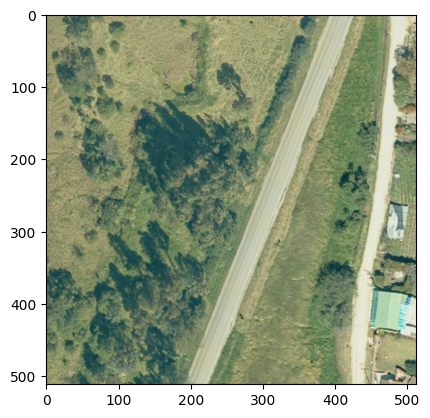

In [8]:
plt.imshow(img.permute(1, 2, 0).cpu().numpy())

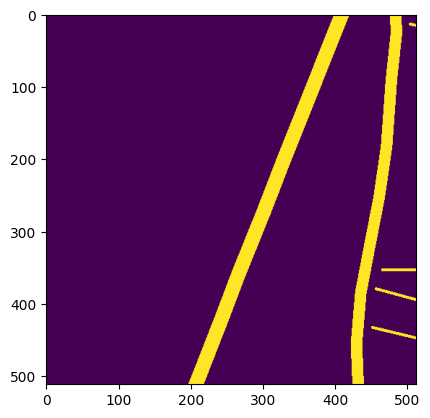

In [9]:
plt.imshow(mask.permute(1,2,0))

# Model

In [10]:
model = smp.Unet(encoder_name='resnet34',encoder_weights='imagenet', in_channels=3, classes=1)
model = model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 218MB/s]


In [11]:
model

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

# Training

In [12]:
best_loss = float("inf")
epochs = 10
all_predictions = []
all_masks = []
memory_predictions_last_epoch = []  # Store predictions only for the last epoch
memory_masks_last_epoch = []  # Store masks only for the last epoch

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_cm = np.zeros((2, 2), dtype=np.int64)
    train_accuracy = 0.0
    train_f1_boundary = 0.0
    train_f1_no_boundary = 0.0
    train_kappa = 0.0

    for images,mask in train_loader:
        images, mask = images.to(device), mask.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, mask)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        output_binary = (torch.sigmoid(output) > 0.5).cpu().numpy().astype(np.uint8)
        mask_binary = mask.cpu().numpy().astype(np.uint8)
        train_cm += confusion_matrix(mask_binary.flatten(), output_binary.flatten())
        train_accuracy += accuracy_score(mask_binary.flatten(), output_binary.flatten())
        train_f1_boundary += f1_score(mask_binary.flatten(), output_binary.flatten(), pos_label=1)
        train_f1_no_boundary += f1_score(mask_binary.flatten(), output_binary.flatten(), pos_label=0)
        train_kappa += cohen_kappa_score(mask_binary.flatten(), output_binary.flatten())

    torch.cuda.empty_cache()

    model.eval()
    val_loss = 0.0
    # Métricas para la validación
    val_cm = np.zeros((2, 2), dtype=np.int64)  # Inicializar matriz de confusión
    val_accuracy = 0.0
    val_f1_boundary = 0.0
    val_f1_no_boundary = 0.0
    val_kappa = 0.0

    with  torch.no_grad():
        for images, mask in val_loader:
            images, mask = images.to(device), mask.to(device)
            output = model(images)
            loss = criterion(output, mask)
            val_loss += loss.item()

            output_binary = (torch.sigmoid(output) > 0.5).cpu().numpy().astype(np.uint8)
            all_predictions.extend(output_binary)
            mask_binary = mask.cpu().numpy().astype(np.uint8)
            all_masks.extend(mask_binary) # Guardar las máscaras originales para imprimir
            val_cm += confusion_matrix(mask_binary.flatten(), output_binary.flatten())
            val_accuracy += accuracy_score(mask_binary.flatten(), output_binary.flatten())
            val_f1_boundary += f1_score(mask_binary.flatten(), output_binary.flatten(), pos_label=1)
            val_f1_no_boundary += f1_score(mask_binary.flatten(), output_binary.flatten(), pos_label=0)
            val_kappa += cohen_kappa_score(mask_binary.flatten(), output_binary.flatten())

            # Guardar predicciones y máscaras solo en la última época
            if epoch == epochs - 1:
                output_binary = (torch.sigmoid(output) > 0.5).cpu().numpy().astype(np.uint8)
                mask_binary = mask.cpu().numpy().astype(np.uint8)

                for j in range(output_binary.shape[0]):
                    memory_predictions_last_epoch.append(output_binary[j])
                    memory_masks_last_epoch.append(mask_binary[j])

    train_loss = train_loss / len(train_loader)
    train_accuracy = train_accuracy / len(train_loader)
    train_f1_boundary = train_f1_boundary / len(train_loader)
    train_f1_no_boundary = train_f1_no_boundary / len(train_loader)
    train_kappa = train_kappa / len(train_loader)

    val_loss = val_loss / len(val_loader)
    val_accuracy = val_accuracy / len(val_loader)
    val_f1_boundary = val_f1_boundary / len(val_loader)
    val_f1_no_boundary = val_f1_no_boundary / len(val_loader)
    val_kappa = val_kappa / len(val_loader)

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), "/content/UNET109.pth")
        print(f"Model saved at epoch {epoch + 1} with validation loss: {val_loss:.4f}")

    print(f"Epoch [{epoch + 1}/{epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Train F1 Boundary: {train_f1_boundary:.4f}, Train F1 No Boundary: {train_f1_no_boundary:.4f}, Train Kappa: {train_kappa:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, Val F1 Boundary: {val_f1_boundary:.4f}, Val F1 No Boundary: {val_f1_no_boundary:.4f}, Val Kappa: {val_kappa:.4f}")
    print(f"Train Confusion Matrix:\n{train_cm}")
    print(f"Validation Confusion Matrix:\n{val_cm}")

# Mostrar todas las máscaras y predicciones para comparación solo de la ultima epoca
if memory_predictions_last_epoch and memory_masks_last_epoch:
    print("Mostrando máscaras y predicciones para comparación de la ultima época...")
    for i, (predicted_mask, mask_original) in enumerate(zip(memory_predictions_last_epoch, memory_masks_last_epoch)):
        plt.figure(figsize=(10, 5))

        # Mostrar máscara original
        plt.subplot(1, 2, 1)
        plt.imshow(mask_original.squeeze(), cmap='gray') # Squeeze to remove extra dimension
        plt.title(f"Máscara Original {i+1}")
        plt.axis('off')

        # Mostrar máscara predicha
        plt.subplot(1, 2, 2)
        plt.imshow(predicted_mask.squeeze(), cmap='gray') # Squeeze to remove extra dimension
        plt.title(f"Máscara Predicha {i+1}")
        plt.axis('off')

        plt.show()
else:
    print("No se encontraron imágenes para mostrar.")

Output hidden; open in https://colab.research.google.com to view.

# Inference

In [13]:
def infer_and_visualize(model, image_paths, device):
    for index, image_path in enumerate(image_paths): # Use enumerate to get index
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        original_image = image.copy()
        image = image.astype('float32') / 255.0

        h, w = image.shape[:2]
        new_h = (h // 32 + 1) * 32
        new_w = (w // 32 + 1) * 32

        image = cv2.copyMakeBorder(image, 0, new_h - h, 0, new_w - w, cv2.BORDER_CONSTANT, value=0)

        image_tensor = torch.tensor(image).permute(2, 0, 1).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image_tensor)
            output = torch.sigmoid(output).cpu().squeeze().numpy()
            output = (output > 0.5).astype(np.uint8)

            output = output[:original_image.shape[0], :original_image.shape[1]]

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.title(f'Imagen original {index + 1}') # Add index to title
        plt.imshow(original_image)

        plt.subplot(1, 3, 2)
        plt.title(f'Mascara {index + 1}') # Add index to title
        plt.imshow(output)

        plt.subplot(1, 3, 3)
        plt.title(f'Superposición {index + 1}') # Add index to title
        plt.imshow(original_image)
        plt.imshow(output, cmap='jet', alpha=0.5)

        plt.show()

In [14]:
model.load_state_dict(torch.load("/content/UNET109.pth"))

<ipython-input-14-0bebb42cff5b>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/UNET109.pth"))


<All keys matched successfully>

In [15]:
model.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [16]:
IMAGE_PATH = '/content/drive/MyDrive/DATA_LINDEROS/DATASET_Subachoque/Ortofoto_512x512/'
MASK_PATH = '/content/drive/MyDrive/DATA_LINDEROS/DATASET_Subachoque/Linderos_512x512/'

inference_image_numbers = ['161','291','292','293','296','297','419','421','422','427']
images_list = [os.path.join(IMAGE_PATH, f'SUBACHOQUE_ORTO_{number}.TIF') for number in inference_image_numbers]

infer_and_visualize(model, images_list, device)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
print(f"Hora de finalización: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

end_time = datetime.datetime.now()

# Calculate the total execution time
total_time = end_time - start_time

# Print the total execution time in hours
print(f"Total execution time: {total_time.total_seconds() / 3600:.2f} hours")

Hora de finalización: 2025-01-25 20:31:32
Total execution time: 0.68 hours


In [18]:
from google.colab import files

# Download the file
files.download("/content/UNET109.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>